<a href="https://colab.research.google.com/github/lineality/DS-Unit-2-Regression-Classification/blob/master/module1/GGA_2_1_1_v2.1_assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Geoffrey Gordon Ashbrook Assignment 2.1.1
2019.09.30

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [2]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 19.30 MiB | 20.40 MiB/s, done.
Resolving deltas: 100% (71/71), done.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 112kB 8.9MB/s 
     |████████████████████████████████| 133kB 57.0MB/s 
     |████████████████████████████████| 57.7MB 486kB/s 
     |████████████████████████████████| 235kB 39.2MB/s 
     |████████████████████████████████| 614kB 48.4MB/s 
     |████████████████████████████████| 235kB 50.3MB/s 
     |████████████████████████████████| 307kB 53.2MB/s 
     |████████████████████████████████| 215kB 54.8MB/s 
     |████████████████████████████████| 51kB 23.1MB/s 
     |██████████

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [6]:
!ls

assignment_regression_classification_1.ipynb  README.md
lesson_regression_classification_1.ipynb      tribeca_wrangling.ipynb


## Inspecting The Data

In [7]:
df.shape

(48818, 34)

In [8]:
df.head(3)

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0        1.5         3  ...                 0                    0
1        1.0         2  ...                 0                    0
2        1.0         1  ...                 0                    0

[3 rows x 34 columns]

###[link text](https://)To select a feature, let us first look at the list of features...

In [9]:
#view a list of df columns
list(df.columns)

['bathrooms',
 'bedrooms',
 'created',
 'description',
 'display_address',
 'latitude',
 'longitude',
 'price',
 'street_address',
 'interest_level',
 'elevator',
 'cats_allowed',
 'hardwood_floors',
 'dogs_allowed',
 'doorman',
 'dishwasher',
 'no_fee',
 'laundry_in_building',
 'fitness_center',
 'pre-war',
 'laundry_in_unit',
 'roof_deck',
 'outdoor_space',
 'dining_room',
 'high_speed_internet',
 'balcony',
 'swimming_pool',
 'new_construction',
 'terrace',
 'exclusive',
 'loft',
 'garden_patio',
 'wheelchair_access',
 'common_outdoor_space']

#Picking a feature and making a graph

## Following...some exploratory deliberations, 'Bedroom' was chosen though bathroom and dogs_allowed were also spied into.


In [10]:
df['bathrooms'].describe()

count    48818.000000
mean         1.201790
std          0.470707
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: bathrooms, dtype: float64

In [11]:

df['price'].describe()

count    48818.000000
mean      3579.560982
std       1762.420875
min       1375.000000
25%       2500.000000
50%       3150.000000
75%       4095.000000
max      15500.000000
Name: price, dtype: float64

In [12]:
import numpy as np

guesstimate = df['price'].mean()
errors = guesstimate - df['price']
mean_absolute_error = errors.abs().mean()
squared_error = errors**2
#squared_error  = np.square(guesstimate, errors).mean() 
mean_squared_error = squared_error.mean()
print(f'If we guessed that a place sold for the mean price of ${guesstimate:,.0f},')
print(f'we would be off by ${mean_absolute_error:,.0f} on average MAE mean absolute error.')
print(f'we would be off by ${mean_squared_error:,.0f} on average MSE mean squared error.')

If we guessed that a place sold for the mean price of $3,580,
we would be off by $1,202 on average MAE mean absolute error.
we would be off by $3,106,064 on average MSE mean squared error.


##How accuate is the baseline?

In [13]:
print('This means the baseline mean is', 100-(mean_absolute_error/guesstimate)*100 ,'% accurate.')

This means the baseline mean is 66.43372774011601 % accurate.


In [0]:
df['test'] = df['bathrooms']>1

https://medium.com/plotly/introducing-plotly-express-808df010143d

In [15]:
import plotly.express as px
px.scatter(df, x='bedrooms', y='price')

In [16]:
px.scatter(df, x='bedrooms', y='price', color="bedrooms", size_max=50)

In [17]:
px.scatter(df, x='bedrooms', y='price', color="bathrooms", size_max=50, facet_col='dogs_allowed')

In [18]:
px.scatter(df, x='bedrooms', y='price', color="bedrooms", size_max=50, facet_col='bathrooms')

## Lets see what happens when we compare...
(Warning: some visualizations are exploratory and may not be suitable for young children.)

In [19]:
px.scatter(df, x="bedrooms", y="price", color="dogs_allowed", size="bathrooms", size_max=40, hover_name="bathrooms")

In [20]:
px.scatter(df, x='bathrooms', y='price', trendline='ols')

##Here will follow a five step process to use sky-kit-learn to plot a linear regression:



In [0]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression



In [0]:
# 2. Instantiate this class
model = LinearRegression()


In [0]:

# 3. Arrange X features matrix & y target vector
features = ['bathrooms']
target = 'price'
X_train = df[features]
y_train = df[target]

In [24]:
# 4. Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
X_train

bathrooms
0            1.5
1            1.0
2            1.0
3            1.0
4            1.0
5            2.0
6            1.0
7            2.0
8            1.0
9            2.0
10           1.0
11           1.0
12           1.0
13           2.0
14           1.0
15           1.0
16           1.0
17           1.0
18           1.0
19           1.0
20           1.0
21           1.0
22           1.0
23           1.0
24           2.0
25           3.5
26           1.0
27           1.0
29           2.0
30           1.0
...          ...
49322        1.0
49323        1.0
49324        1.0
49325        1.0
49326        2.0
49327        1.0
49328        1.0
49329        1.0
49330        1.0
49331        1.5
49332        1.0
49333        1.0
49334        2.0
49335        1.0
49336        2.0
49337        1.0
49338        2.0
49339        1.0
49340        1.0
49341        1.0
49342        1.0
49343        1.0
49344        1.0
49345        1.0
49346        1.0
49347        1.0
49348        1.0
49349        1.0
49350        1.0
49351        1.0

[48818 rows x 1 columns]

In [26]:
y_train

0         3000
1         5465
2         2850
3         3275
4         3350
5         7995
6         3600
7         5645
8         1725
9         5800
10        1950
11        1675
12        3000
13        6895
14        3050
15        2350
16        3650
17        1695
18        5000
19        3973
20        4395
21        2999
22        2595
23        3695
24        7400
25        7500
26        2295
27        3164
29        5600
30        2750
         ...  
49322     3126
49323     3325
49324     2100
49325     3500
49326    11950
49327     2980
49328     2850
49329     2885
49330     2950
49331     2650
49332     4850
49333     3475
49334     5815
49335     2050
49336     4600
49337     2000
49338     9200
49339     4550
49340     1900
49341     2500
49342     2500
49343     2675
49344     3645
49345     2179
49346     4500
49347     3200
49348     3950
49349     2595
49350     3350
49351     2200
Name: price, Length: 48818, dtype: int64

In [27]:
# interpolation
# 5.1 Here we will try appling our model to new data
bedroom_number = 2
X_test = [[bedroom_number]]

model.predict(X_test)

array([5633.65332568])

In [28]:
# extrapoloation
# 5.2 Here we will try appling our model to new data
bedroom_number = 20
X_test = [[bedroom_number]]

model.predict(X_test)


array([51954.3924372])

In [29]:
y_pred = model.predict(X_test)
print(f'Predicted price for a {X_test} bedroom place:\n' + str(y_pred))

Predicted price for a [[20]] bedroom place:
[51954.3924372]


## Prediction Function

### Here is a function to make a specific prediction, which can then be compared etc.

In [0]:
def predict(bedrooms):
    y_pred = model.predict([[bedrooms]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    result = f'${estimate:,.0f} is the estimated price for space with  {bedrooms:,.0f} bedrooms'
    explanation = f'In this linear regression, each additional bedroom adds ${coefficient:,.0f}.'
    return result + explanation

In [31]:
predict(2)

'$5,634 is the estimated price for space with  2 bedroomsIn this linear regression, each additional bedroom adds $2,573.'

## Y = M*X + B
# Coeficient

###The "coefficient" of the this function is (M) the value by which the houseing price (Y) goes up for every bedroom (X). 


https://statisticsbyjim.com/glossary/regression-coefficient/

#Error: MSE and MAE
##Let's Analyize the accuracy (precision?) of our model.

## Discussion:

While I have been introduced to the items below, 
I am not entirely sure what the differnces in their use are, 
- baseline (medean, mean, mode...other?)
- residuals 
- MeanAboluteError 
- MeamSquaredError 
- SumSquaredError/Residuals, 

I looked over a few explanations of linear regression online over the weekend but (perhaps they were more from math-statistics) training-test splits were not mentioned as part of comparison to baseline. 


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html



Note: The MAE and MSE between bedrooms and bathrooms are surprisingly similar. 

In [34]:
import sklearn
sklearn.metrics.mean_absolute_error(df['price'], df['bedrooms'])

3578.0238231799744

In [35]:
sklearn.metrics.mean_squared_error(df['price'], df['bedrooms'])

15906231.705416035

In [36]:

sklearn.metrics.mean_absolute_error(df['price'], df['bedrooms'])

3578.0238231799744

In [37]:
import sklearn
sklearn.metrics.mean_absolute_error(df['price'], df['bathrooms'])

3578.3591912819043

In [38]:
sklearn.metrics.mean_squared_error(df['price'], df['bathrooms'])

15909578.120222049

In [39]:
list(df.columns)


['bathrooms',
 'bedrooms',
 'created',
 'description',
 'display_address',
 'latitude',
 'longitude',
 'price',
 'street_address',
 'interest_level',
 'elevator',
 'cats_allowed',
 'hardwood_floors',
 'dogs_allowed',
 'doorman',
 'dishwasher',
 'no_fee',
 'laundry_in_building',
 'fitness_center',
 'pre-war',
 'laundry_in_unit',
 'roof_deck',
 'outdoor_space',
 'dining_room',
 'high_speed_internet',
 'balcony',
 'swimming_pool',
 'new_construction',
 'terrace',
 'exclusive',
 'loft',
 'garden_patio',
 'wheelchair_access',
 'common_outdoor_space',
 'test']

Testing Area:

In [40]:
import sklearn
sklearn.metrics.mean_absolute_error(df['price'], df['bathrooms'])

3578.3591912819043

In [41]:
sklearn.metrics.mean_squared_error(df['price'], df['bathrooms'])

15909578.120222049

Below are other error "experiments" that are probably not...well to do. 

In [0]:
# This value was taken from the graph above using a known example
y_test = [5584]

In [43]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Our model's Mean-Absolute_Error is: ${mae:,.0f}")

Our model's Mean-Absolute_Error is: $46,370


In [44]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print(f"Our model's Meany Squared Error error: ${MSE:,.0f}")

Our model's Meany Squared Error error: $2,150,213,295


In [0]:
# Mean Squared Error 
#MSE2 = np.square(np.subtract(df['price'],Y_pred)).mean() 
#MSE2

In [46]:
guesstimate = df['price'].mean()
errors = guesstimate - df['price']
mean_absolute_error = errors.abs().mean()
squared_error = errors**2
#squared_error  = np.square(guesstimate, errors).mean() 
mean_squared_error = squared_error.mean()
print(f'If we guessed that a place sold for the mean price of ${guesstimate:,.0f},')
print(f'we would be off by ${mean_absolute_error:,.0f} on average MAE mean absolute error.')
print(f'we would be off by ${mean_squared_error:,.0f} on average MSE mean squared error.')

If we guessed that a place sold for the mean price of $3,580,
we would be off by $1,202 on average MAE mean absolute error.
we would be off by $3,106,064 on average MSE mean squared error.


#Extra Credit Widget!


In [47]:
#this works, the import calls seemed to be the issue...
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(predict, bedrooms=(1, 10));

interactive(children=(IntSlider(value=5, description='bedrooms', max=10, min=1), Output()), _dom_classes=('wid…

In [0]:
#another experiment not working
IntSlider(min=1, max=6, step=1, value=10)
interact(predict, x=widgets.IntSlider(min=1, max=6, step=1, value=10));

Multiple features:
The above exploratory graphs show some comparison of multiple features. 

For example, for pet owners or pet businesses perhaps, the patterns between animal ownership and bedroom number is quite interesting.

While we usually talk about lines or curves, I wonder if there is a 'doughnut' or 'gap' modeling focus, where there is a possible important interuption in the data (e.g. how much effort should a business spend trying to sell petfood to people who live in 4-bedroom homes in this dataset). 

ValueError: ignored

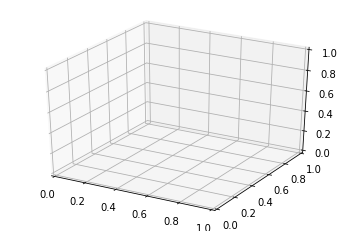

In [50]:
#gave this a try to experiment...didn't get it all

import numpy as np 
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
  
def generate_dataset(n): 
    x = [] 
    y = [] 
    for i in range(n): 
        x1 = df['bedrooms']
        x2 = df['bathrooms']
        x.append([1, x1, x2]) 
        y.append(df['price'] + 1) 
    return np.array(x), np.array(y) 
  
x, y = generate_dataset(20) 
  
mpl.rcParams['legend.fontsize'] = 12
  
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5) 
ax.legend() 
ax.view_init(45, 0) 
  
plt.show() 
